In [71]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Filtering out the warnings.
import warnings
warnings.filterwarnings("ignore")

# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline



#Model Building libraries
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from bioinfokit.visuz import cluster
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
!pip install bioinfokit

# Loading the dataset

In [133]:
#read the mcdonalds dataset
mcdonalds = pd.read_csv('/content/mcdonalds.csv', encoding='utf-8' )


# Exploring Data

 inspecting basic features such as the variable names

In [74]:
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

 inspecting  the dataset sample size

In [263]:
mcdonalds.shape

(1453, 16)

inspecting  first three rows of the data

In [76]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [77]:
MD_x=mcdonalds.iloc[:,0:11].values # Convert columns 1 to 11 to a NumPy matrix

In [78]:
MD_x
# Considering only the 11 cols and converting it into array

array([['No', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['No', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'No'],
       ...,
       ['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['Yes', 'Yes', 'No', ..., 'No', 'Yes', 'No'],
       ['No', 'Yes', 'No', ..., 'Yes', 'No', 'Yes']], dtype=object)

In [79]:
MD_x = (MD_x == "Yes").astype(int)  # Replace "Yes" with 1, others with 0


In [80]:
column_means = pd.DataFrame(MD_x).mean().round(2)  # Calculate column means and round to 2 decimals

In [81]:
column_means

0     0.55
1     0.91
2     0.09
3     0.87
4     0.53
5     0.90
6     0.60
7     0.64
8     0.36
9     0.20
10    0.24
dtype: float64

In [82]:
result = pd.Series(column_means.values, index=mcdonalds.iloc[:,0:11].columns)


In [83]:
result

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

output:The average values of the transformed binary numeric segmentation variables indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY, 91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that McDonald’s food is SPICY.

In [84]:
MD_pca=PCA(MD_x)

In [85]:

MD_pca = PCA().fit(MD_x)  # Create and fit PCA model


# Extract component information
components = pd.DataFrame(MD_pca.components_.T)  # Transpose for row-wise components
std_dev = MD_pca.singular_values_
explained_variance = MD_pca.explained_variance_ratio_
index = ["PC{}".format(i + 1) for i in range(len(MD_pca.components_.T))]
# Create DataFrame with desired columns and labels
df_summary = pd.DataFrame({


    "Standard Deviation": std_dev,
    "Proportion of Variance": explained_variance,
    "Cumulative Proportion": np.cumsum(explained_variance)},index=index
)

# Print the DataFrame with column labels

df_summary=df_summary.to_string(index=False)
print(df_summary)

 Standard Deviation  Proportion of Variance  Cumulative Proportion
          28.847461                0.299447               0.299447
          23.147166                0.192797               0.492244
          19.228584                0.133045               0.625290
          15.196267                0.083096               0.708386
          12.856858                0.059481               0.767866
          11.823051                0.050300               0.818166
          11.038951                0.043849               0.862015
          10.483555                0.039548               0.901563
          10.107424                0.036761               0.938323
           9.482147                0.032353               0.970677
           9.027211                0.029323               1.000000


In [86]:
# Assuming 'MD.pca' is your fitted PCA object and 'components_' stores the loadings
rotation_matrix = np.round(MD_pca.components_.T, 1)  # Round to one decimal place and transpose

# Create a DataFrame for better presentation (optional)
df = pd.DataFrame(rotation_matrix)
# print(df.to_string())  # Prints the DataFrame with column and row indices# Assuming 'MD.pca' is your fitted PCA object and 'components_' stores the loadings
rotation_matrix = np.round(MD_pca.components_.T, 1)  # Round to one decimal place and transpose

# Create a DataFrame for better presentation (optional)
df = pd.DataFrame(rotation_matrix)
print(df.to_string())  # Prints the DataFrame with column and row indices

     0    1    2    3    4    5    6    7    8    9    10
0  -0.5  0.4 -0.3  0.1 -0.3  0.2 -0.3  0.0  0.6 -0.1  0.0
1  -0.2  0.0 -0.1 -0.1  0.3 -0.3 -0.1 -0.1 -0.0 -0.7 -0.5
2  -0.0  0.0 -0.0  0.2  0.1 -0.4  0.7  0.4  0.4 -0.1  0.1
3   0.1 -0.0 -0.3 -0.4 -0.1 -0.4 -0.4  0.6 -0.2 -0.0  0.3
4   0.3 -0.1 -0.8  0.3  0.4  0.2  0.0 -0.1 -0.0  0.0  0.0
5  -0.1 -0.1 -0.1 -0.1  0.1 -0.6 -0.1 -0.6  0.2  0.2  0.3
6  -0.3 -0.6 -0.1  0.1 -0.1 -0.1 -0.0  0.1  0.1  0.4 -0.5
7  -0.5  0.3 -0.3 -0.0 -0.2 -0.1  0.4 -0.1 -0.6  0.1  0.0
8   0.3  0.6  0.0  0.1 -0.0 -0.3 -0.1  0.0  0.1  0.5 -0.5
9  -0.2  0.1  0.2  0.8  0.3 -0.2 -0.3  0.2 -0.2 -0.0  0.2
10  0.4 -0.1 -0.1  0.4 -0.7 -0.2 -0.0 -0.2 -0.1 -0.3 -0.0


In [87]:
new_index = mcdonalds.iloc[:,0:11].columns.tolist()

In [88]:
new_index



['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting']

In [89]:
df = df.set_axis(new_index, axis=0 )  # Set axis 0 for rows
new_column_names = {i: "PC{}".format(i + 1) for i in range(11)}  # Adjust range for actual number of columns
df = df.rename(columns=new_column_names)
print(df)

            PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
yummy      -0.5  0.4 -0.3  0.1 -0.3  0.2 -0.3  0.0  0.6  -0.1   0.0
convenient -0.2  0.0 -0.1 -0.1  0.3 -0.3 -0.1 -0.1 -0.0  -0.7  -0.5
spicy      -0.0  0.0 -0.0  0.2  0.1 -0.4  0.7  0.4  0.4  -0.1   0.1
fattening   0.1 -0.0 -0.3 -0.4 -0.1 -0.4 -0.4  0.6 -0.2  -0.0   0.3
greasy      0.3 -0.1 -0.8  0.3  0.4  0.2  0.0 -0.1 -0.0   0.0   0.0
fast       -0.1 -0.1 -0.1 -0.1  0.1 -0.6 -0.1 -0.6  0.2   0.2   0.3
cheap      -0.3 -0.6 -0.1  0.1 -0.1 -0.1 -0.0  0.1  0.1   0.4  -0.5
tasty      -0.5  0.3 -0.3 -0.0 -0.2 -0.1  0.4 -0.1 -0.6   0.1   0.0
expensive   0.3  0.6  0.0  0.1 -0.0 -0.3 -0.1  0.0  0.1   0.5  -0.5
healthy    -0.2  0.1  0.2  0.8  0.3 -0.2 -0.3  0.2 -0.2  -0.0   0.2
disgusting  0.4 -0.1 -0.1  0.4 -0.7 -0.2 -0.0 -0.2 -0.1  -0.3  -0.0


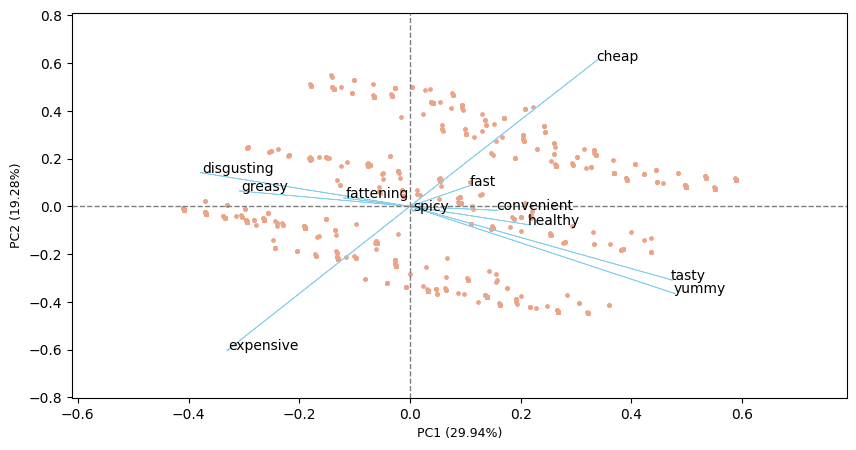

In [90]:
# get PC scores
pca_scores = PCA().fit_transform(MD_x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=-MD_pca.components_, labels=mcdonalds.columns.values, var1=round(MD_pca.explained_variance_ratio_[0]*100, 2),
    var2=round(MD_pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))


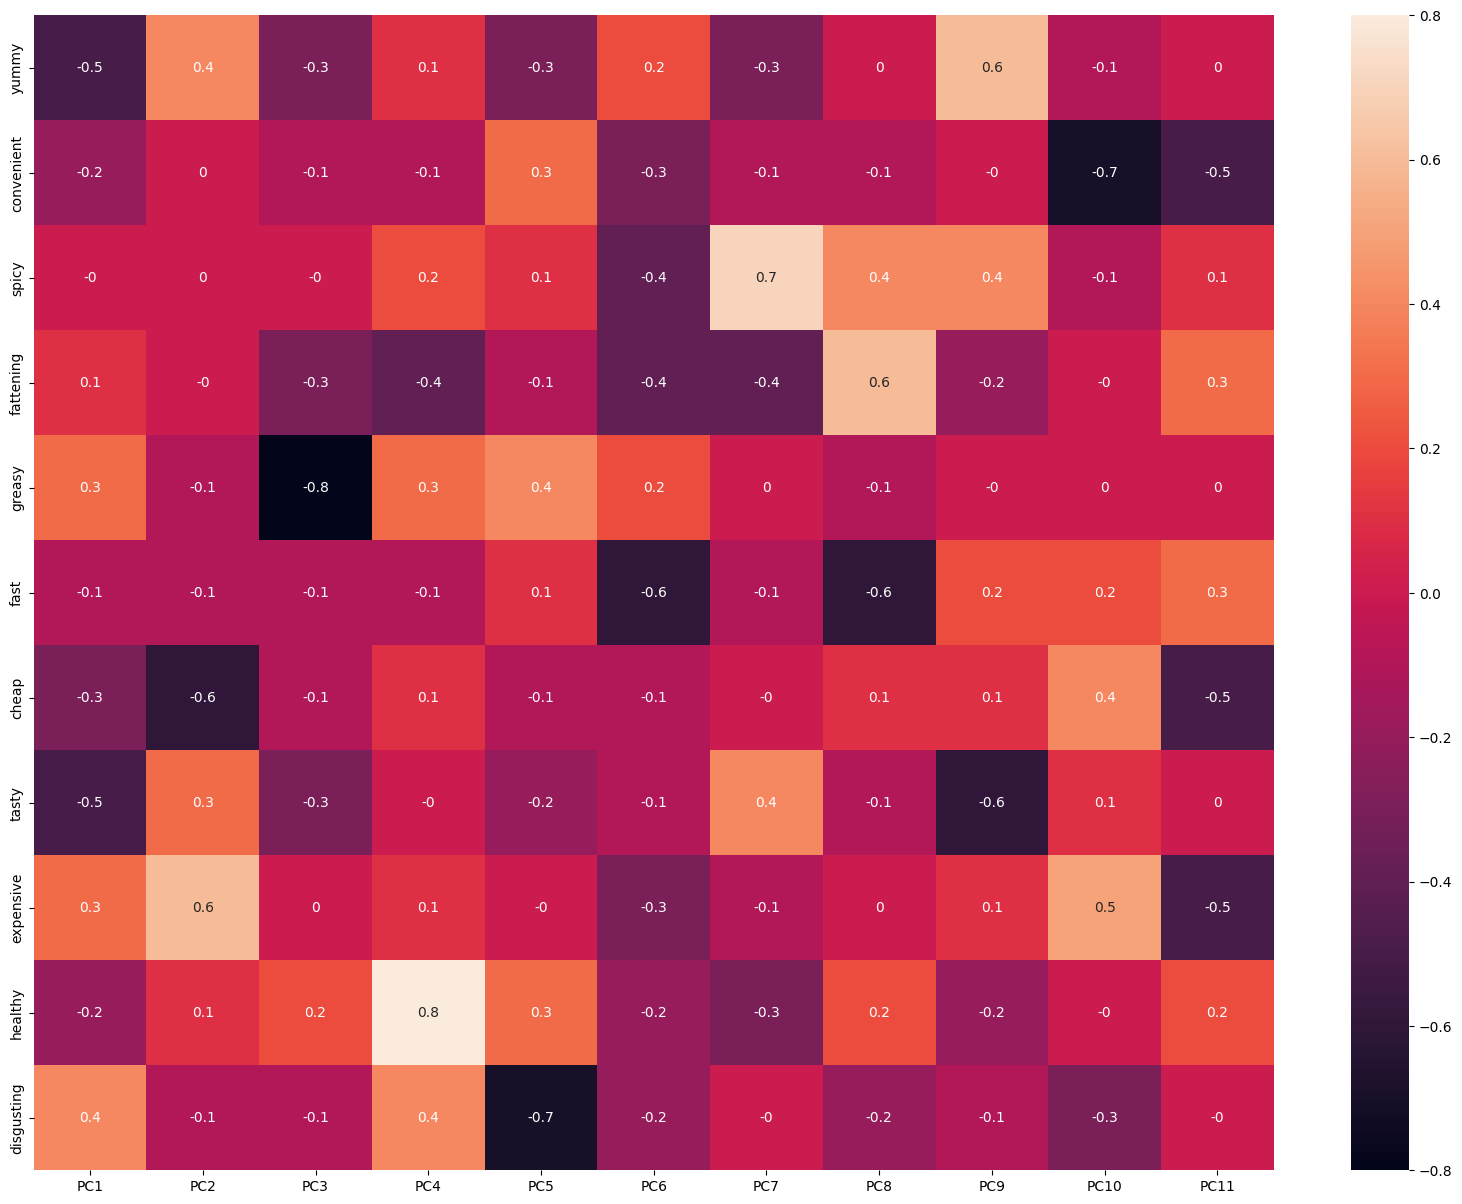

In [91]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(df, annot=True)
plt.show()

#output:two segmentation variables with the highest loadings ,principal component 2 are CHEAP and EXPENSIVE, indicating that this principal component captures the price dimension

# Step 5: Extracting Segments

Step 5 is where we extract segments. To illustrate a range of extraction techniques, we subdivide this step into three sections. In the first section, we will use standard k-means analysis. In the second section, we will use finite mixtures of binary distributions. In the third section, we will use finite mixtures of regressions.

step 5a:Extracting Segments Using k-Means

KMeans(n_clusters=2, n_init=10, random_state=1234)
Cluster labels for k=3: [2 4 4 ... 4 1 3]


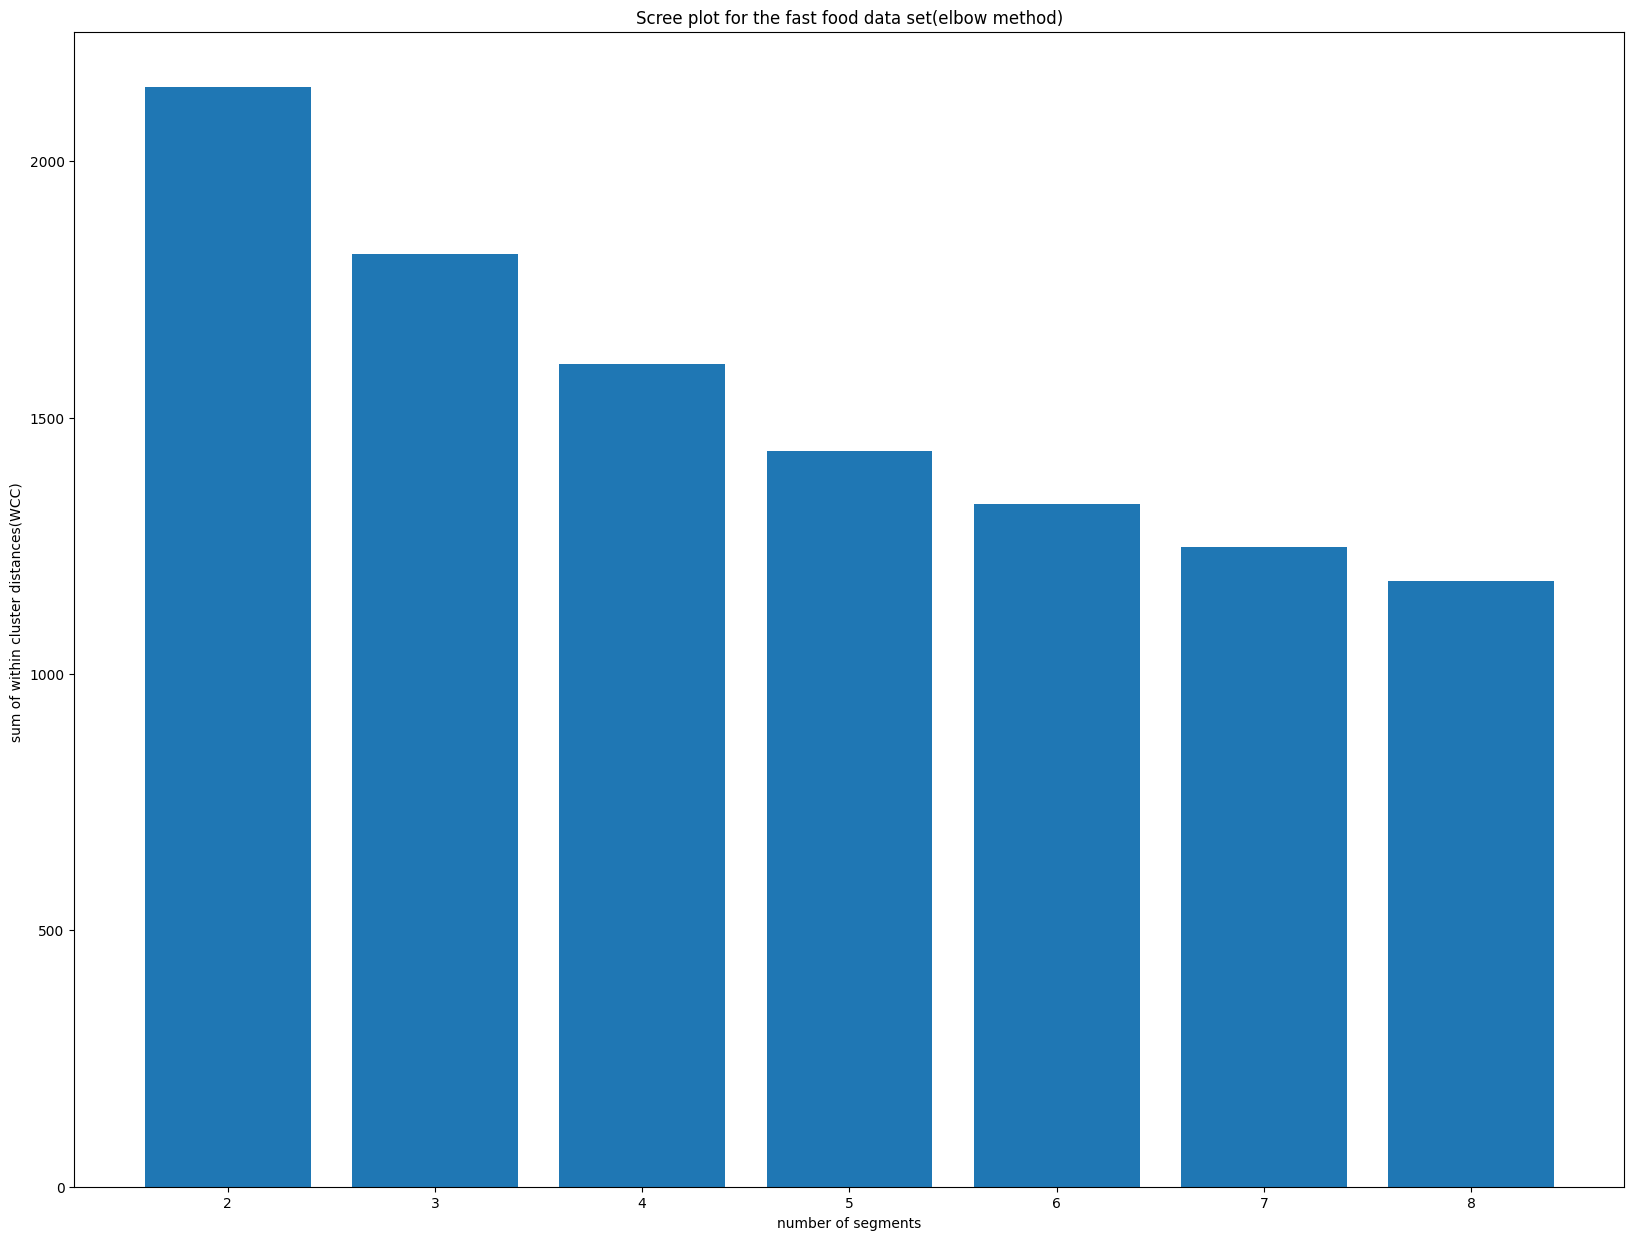

In [92]:
from sklearn.cluster import KMeans

# ... your data preparation code ...

# Define a range of cluster numbers (k) for evaluation
k_range = range(2, 9)  # Adjust based on your needs (2 to 8)

# Initialize lists for results - WCSS and cluster assignments
wcss = []
cluster_labels = []
MD_km28={}
for k in k_range:
    # Fit a KMeans model with the current k
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    MD_km28[str(k)] =kmeans

    # Extract relevant information
    inertia = kmeans.inertia_  # WCSS
    wcss.append(inertia)

    # Perform relabeling (similar to R) - shift by 1 for 1-based indexing
    cluster_labels.append(kmeans.labels_ + 1)


# Analyze WCSS values to identify optimal number of clusters
# Access cluster labels for each data point (outer list indexes correspond to k values)
result = {
    'wcss': wcss,  # WCSS values per k
    'cluster_labels': cluster_labels  # Cluster labels per k
}


print(MD_km28['2'])
# Example usage (assuming k=3):

print("Cluster labels for k=3:", cluster_labels[2])
plt.bar(range(2,9),wcss)
plt.title("Scree plot for the fast food data set(elbow method)")
plt.xlabel("number of segments")
plt.ylabel("sum of within cluster distances(WCC) ")
plt.show()

In [93]:
kmeans=KMeans(n_clusters=8,init='k-means++',n_init=10,random_state=1234)
y_kmeans=kmeans.fit_predict(MD_x)


# visualize cluster

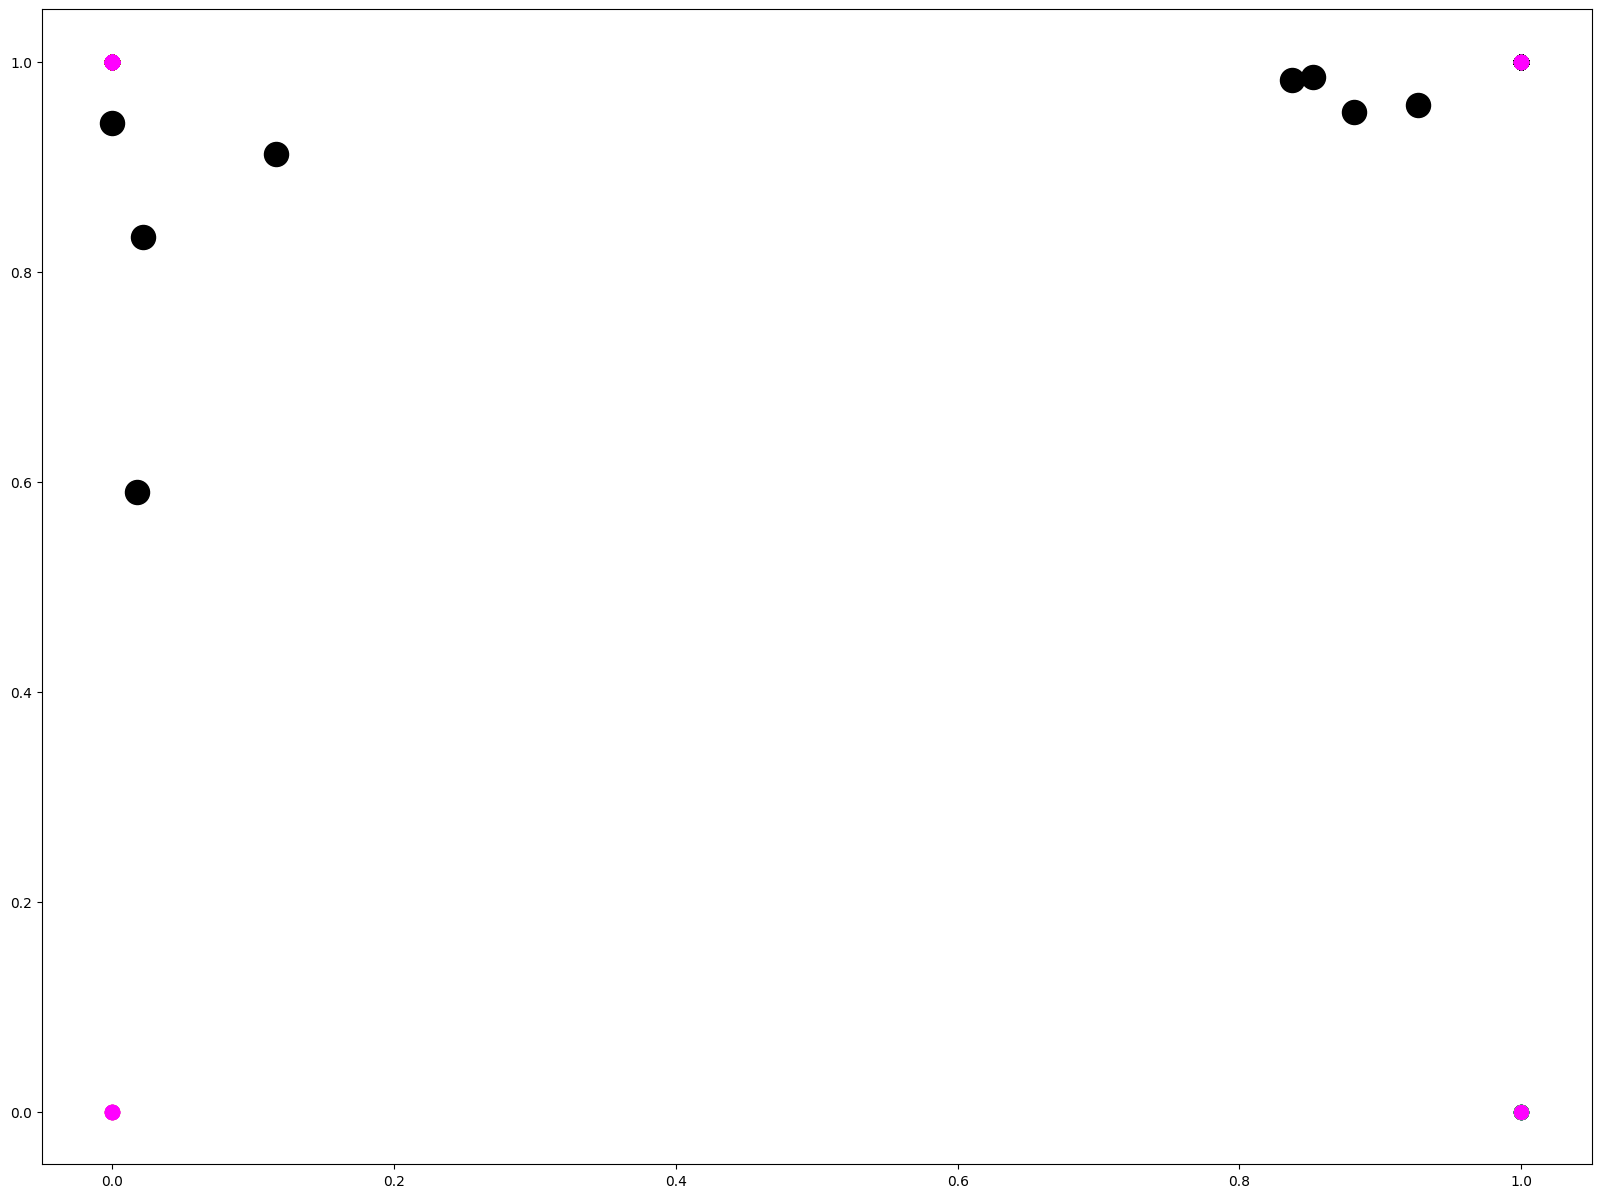

In [94]:
plt.scatter(MD_x[y_kmeans==1,0],MD_x[y_kmeans==1,1],s=100,c='red',label='cluster 2')
plt.scatter(MD_x[y_kmeans==2,0],MD_x[y_kmeans==2,1],s=100,c='blue',label='cluster 3')
plt.scatter(MD_x[y_kmeans==3,0],MD_x[y_kmeans==3,1],s=100,c='cyan',label='cluster 4')
plt.scatter(MD_x[y_kmeans==4,0],MD_x[y_kmeans==4,1],s=100,c='yellow',label='cluster 5')
plt.scatter(MD_x[y_kmeans==5,0],MD_x[y_kmeans==5,1],s=100,c='green',label='cluster 6')
plt.scatter(MD_x[y_kmeans==6,0],MD_x[y_kmeans==6,1],s=100,c='pink',label='cluster 7')
plt.scatter(MD_x[y_kmeans==7,0],MD_x[y_kmeans==7,1],s=100,c='magenta',label='cluster 8')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black',label='centroids')

Above scree plot, it's difficult to determine the elbow definitively, but generally, components explaining a higher proportion of variance are considered more important

# stability-based data structure analysis

Stability-based data structure analysis also indicates whether market segments occur naturally in the data, or if they have to be artificially constructed

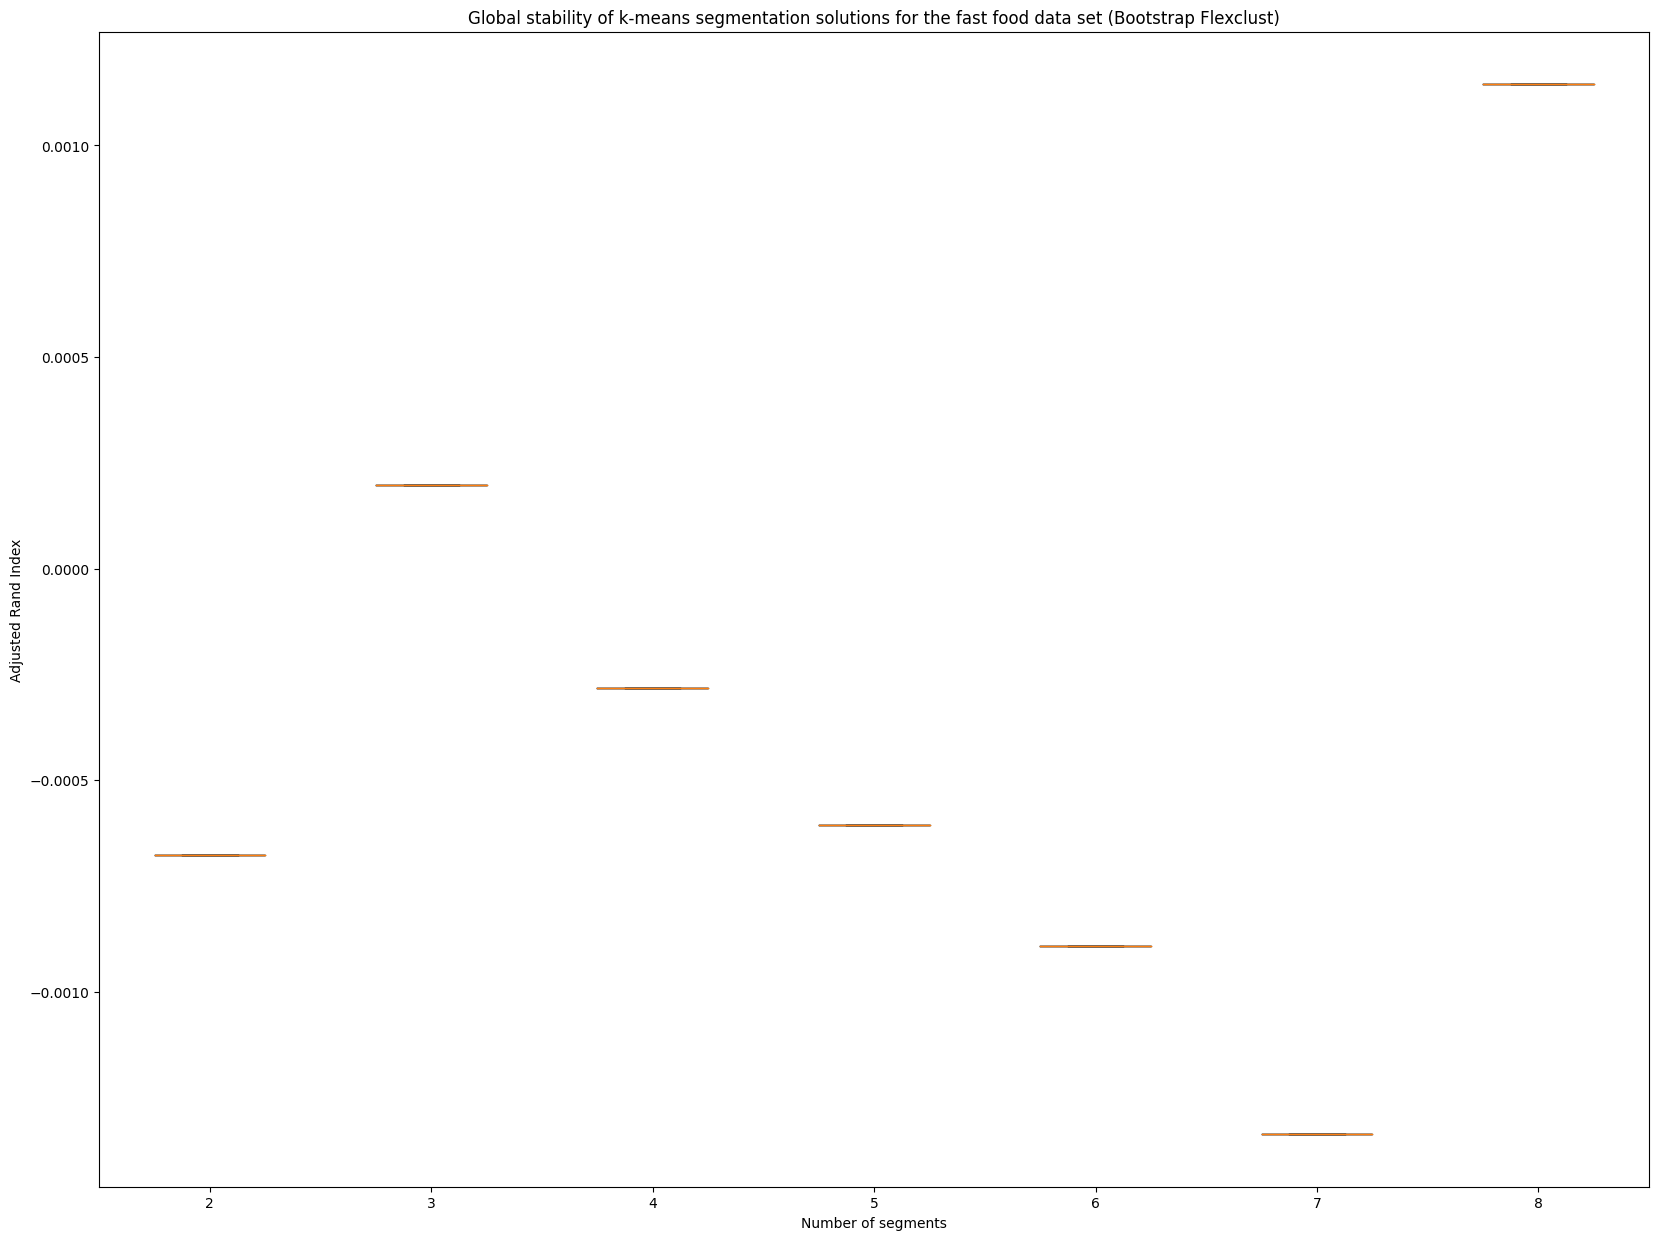

In [95]:

nboot = 100
nrep = 10

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample =  resample(MD_x, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD_x)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global stability of k-means segmentation solutions for the fast food data set (Bootstrap Flexclust)")
plt.show()

In [96]:
# from sklearn.metrics import adjusted_rand_score
# def calculate_adjusted_rand_index(data, k_range, n_rep=10, n_boot=100):
#     all_labels = []
#     for k in k_range:  # Iterate through k values in k_range
#         for _ in range(n_boot):
#             kmeans = KMeans(n_clusters=k, n_init=n_rep, random_state=1234)
#             labels = kmeans.fit_predict(data)
#             all_labels.append(labels)

#     ari_scores = []
#     for i in range(n_boot):
#         for j in range(i + 1, n_boot):
#             if i < len(k_range) and j < len(k_range):
#               ari = adjusted_rand_score(all_labels[i], all_labels[j])
#               ari_scores.append(ari)

#     return ari_scores
# k=range(2,9)
# adjusted_rand_index=calculate_adjusted_rand_index(MD_x,k, n_rep=10, n_boot=100)
# plt.boxplot(adjusted_rand_index, labels=list(k), whis=10)
# plt.xlabel("Number of segments")
# plt.ylabel("Adjusted Rand Index")
# plt.title("Global stability of k-means segmentation solutions for the fast food data set (Bootstrap Flexclust)")
# plt.show()

2


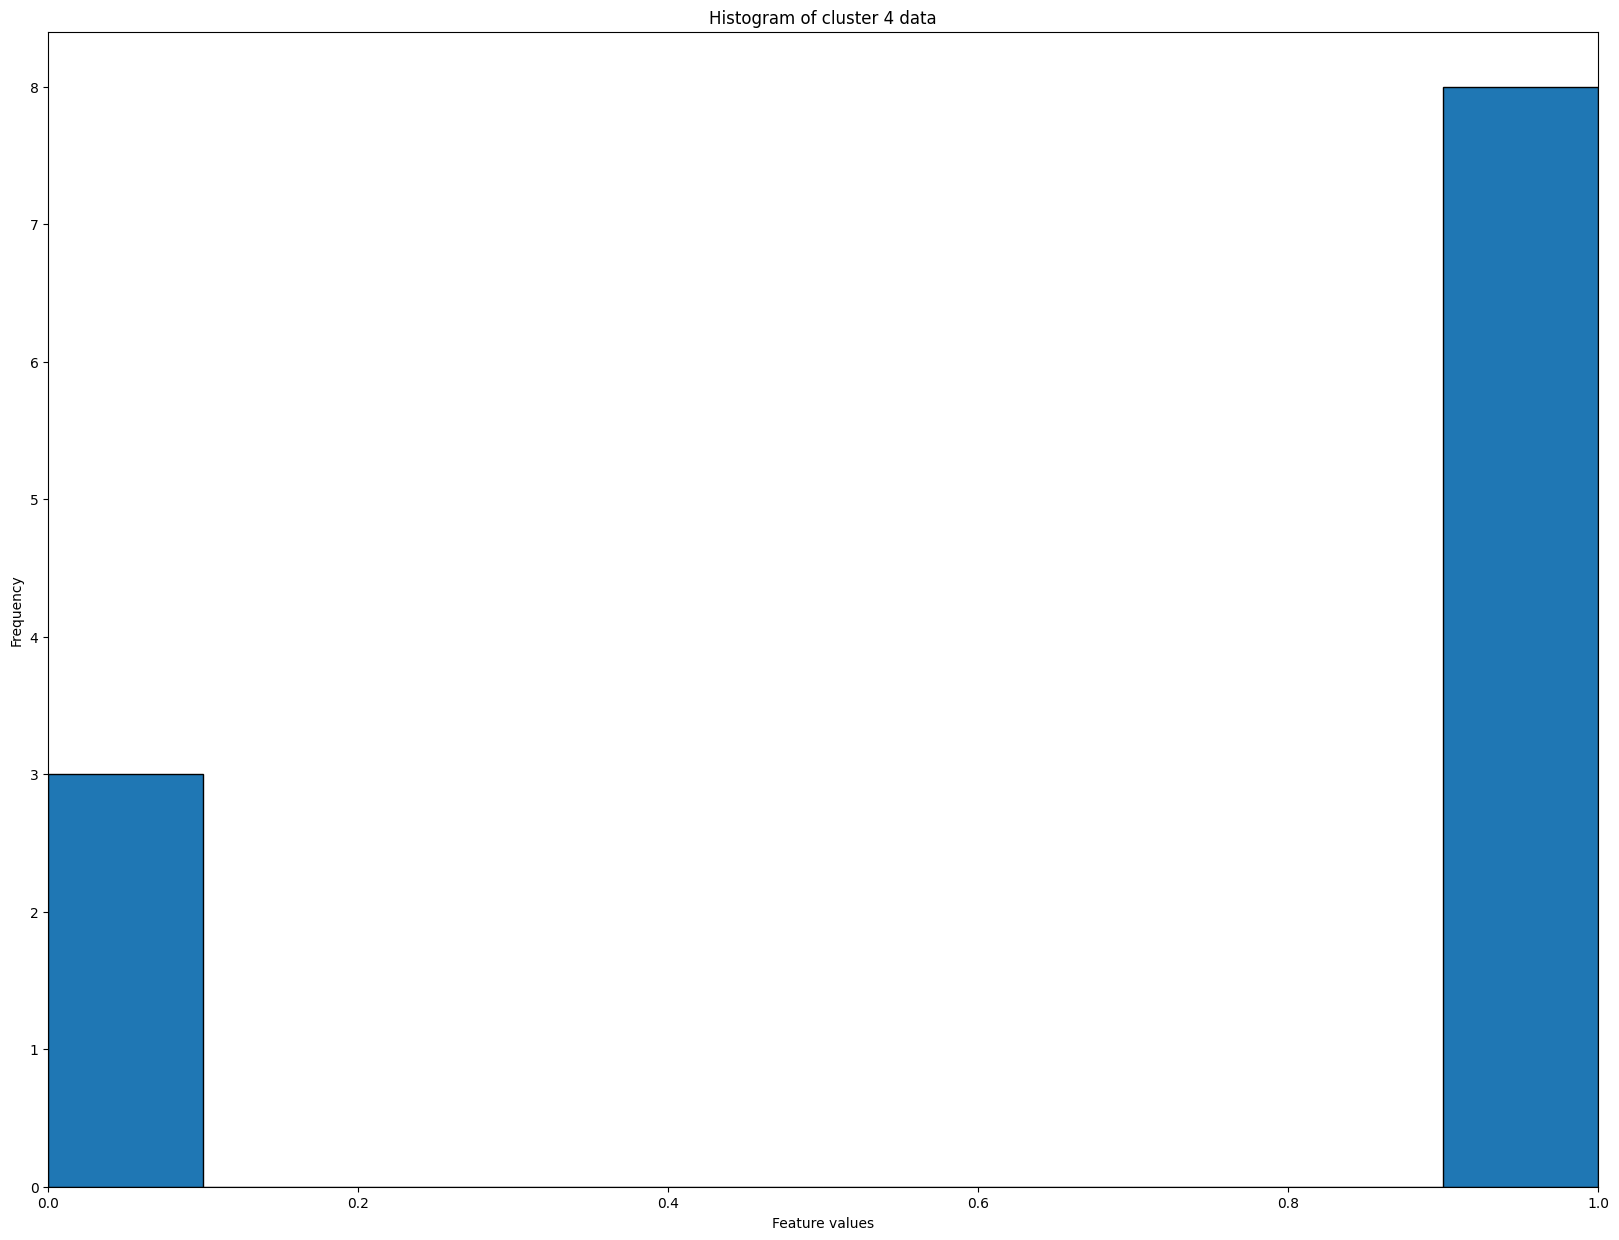

In [97]:

print(cluster_labels[3])

data_cluster_4 = MD_x[cluster_labels[2] ]  # Use indexing for cluster 4

# # Create the histogram
# import matplotlib.pyplot as plt

plt.hist(data_cluster_4, bins=None, edgecolor='black')  # Adjust bins if needed
plt.xlim(0, 1)  # Set x-axis limits
plt.xlabel("Feature values")
plt.ylabel("Frequency")
plt.title("Histogram of cluster 4 data")
plt.show()

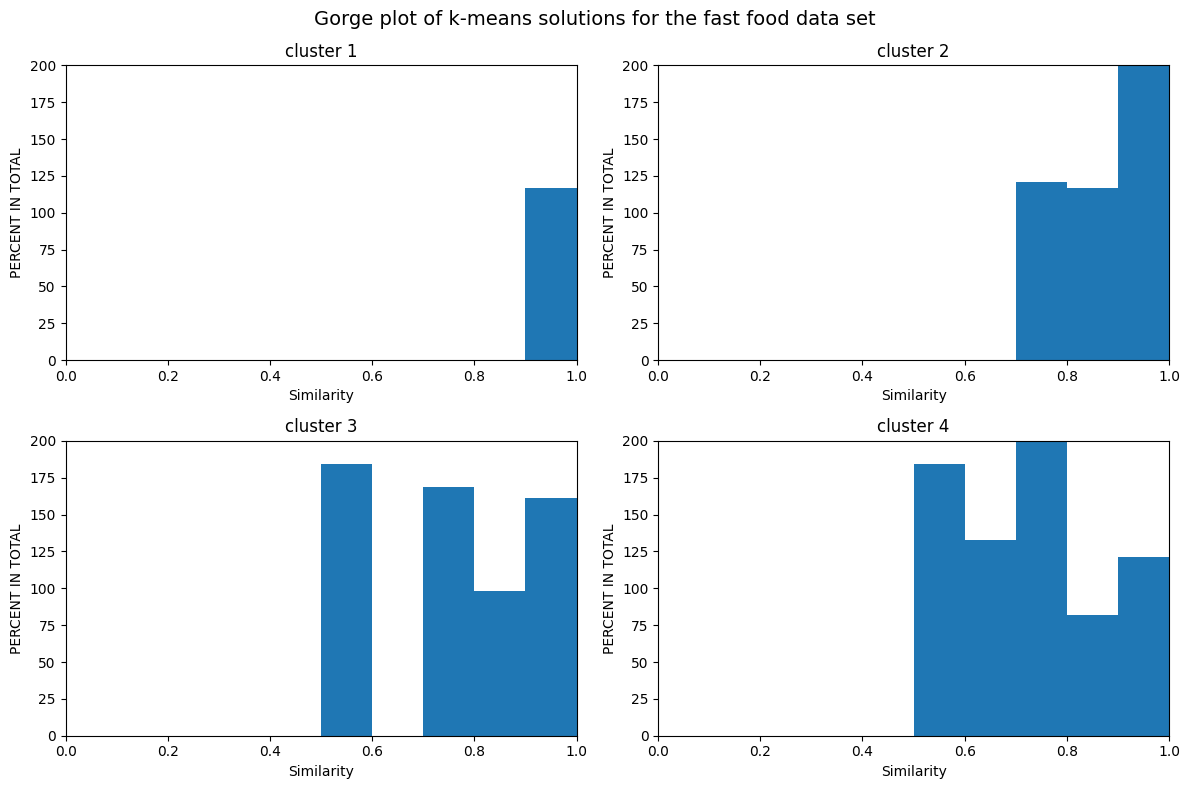

In [98]:

# Define constants outside the loop for clarity
range_values = (0, 1)
num_bins = 10
max_frequency = 200
num_clusters = 4  # Assuming there are 4 clusters (modify if needed)

# Pre-allocate figure and axes for efficiency
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
plt.suptitle("Gorge plot of k-means solutions for the fast food data set", fontsize=14)
for i in range(1,5):
    # # Combine label prediction and similarity calculation
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    MD_km28[str(i)]=kmeans
    labels = MD_km28[str(i)].predict(MD_x)
    similarities = MD_km28[str(i)].transform(MD_x).min(axis=1)



    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('PERCENT IN TOTAL')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

None of the segments shown in the above Fig  is well separated from the other segments, and proximity to at least one other segment is present as indicated by the similarity values all being greater than 0.3 and less than 0.8.

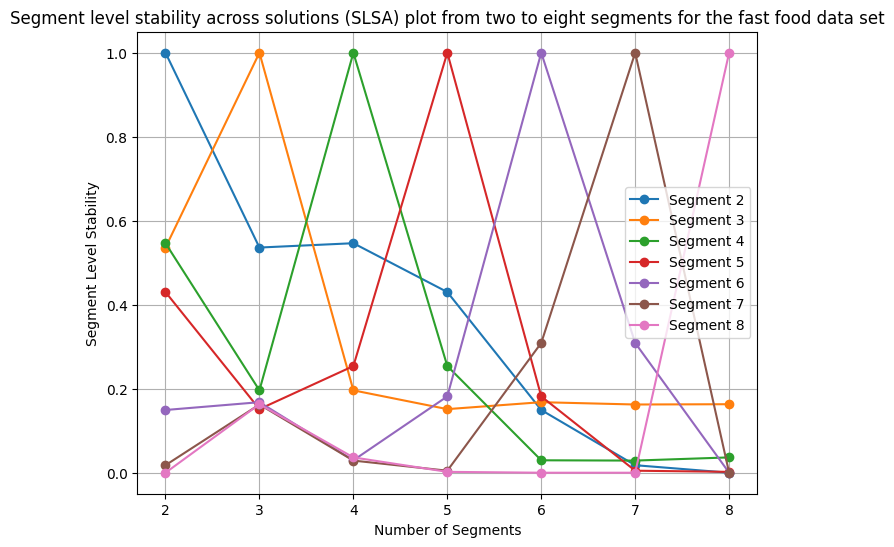

In [99]:


cluster_labels_list = []
for i in range(2,9):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    cluster_labels = kmeans.predict(MD_x)
    cluster_labels_list.append(cluster_labels)
    similarities = kmeans.transform(MD_x)
    row = (i - 1) // 2
    col = (i - 1) % 2


plt.figure(figsize=(8, 6))
for k, i in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(cluster_labels_list[k] == labels) for labels in cluster_labels_list], marker='o',label=f'Segment {i}' )

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment level stability across solutions (SLSA) plot from two to eight segments for the fast food data set')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

When their are clustering with  5,7, and 8 segments then the average segment level stability is less the 0.25 compared to other segments
When their are clustering with 2,3,4 and 6segments then the average segment level stability is less the 0.5 compared to other segments

In [100]:
from sklearn.cluster import SpectralCoclustering
from sklearn.preprocessing import StandardScaler
import pandas as pd  # For NaN handling
import numpy as np  # For error handling

# Assuming MD.x is your data matrix
for i in range(2, 9):
    # Check for NaNs (optional)
    if np.isnan(MD_x).any():
    # Handle NaNs (e.g., imputation or removal)
    # ... (implement your preferred NaN handling)
     pass

    # Normalize the data
    scaler = StandardScaler()
    MD_x_scaled = scaler.fit_transform(MD_x)

    try:
        slsw = SpectralCoclustering(n_clusters=i, n_init=20, random_state=1234)
        slsw.fit(MD_x_scaled)

        if 'affinity_matrix_' in slsw.__dict__:  # Check for attribute directly
            cocluster_labels = (slsw.affinity_matrix_, slsw.get_params()['indices'])
        else:
            print(f"Warning: 'affinity_matrix_' might not be available in this scikit-learn version.")
            # Handle missing attribute (e.g., use alternative approaches)
            pass
    except ValueError as e:
        if 'infs' in str(e):  # Check for infinity specifically
            print(f"Warning: Infinity encountered for {i} clusters. Skipping.")
        else:
            raise e  # Re-raise other ValueErrors

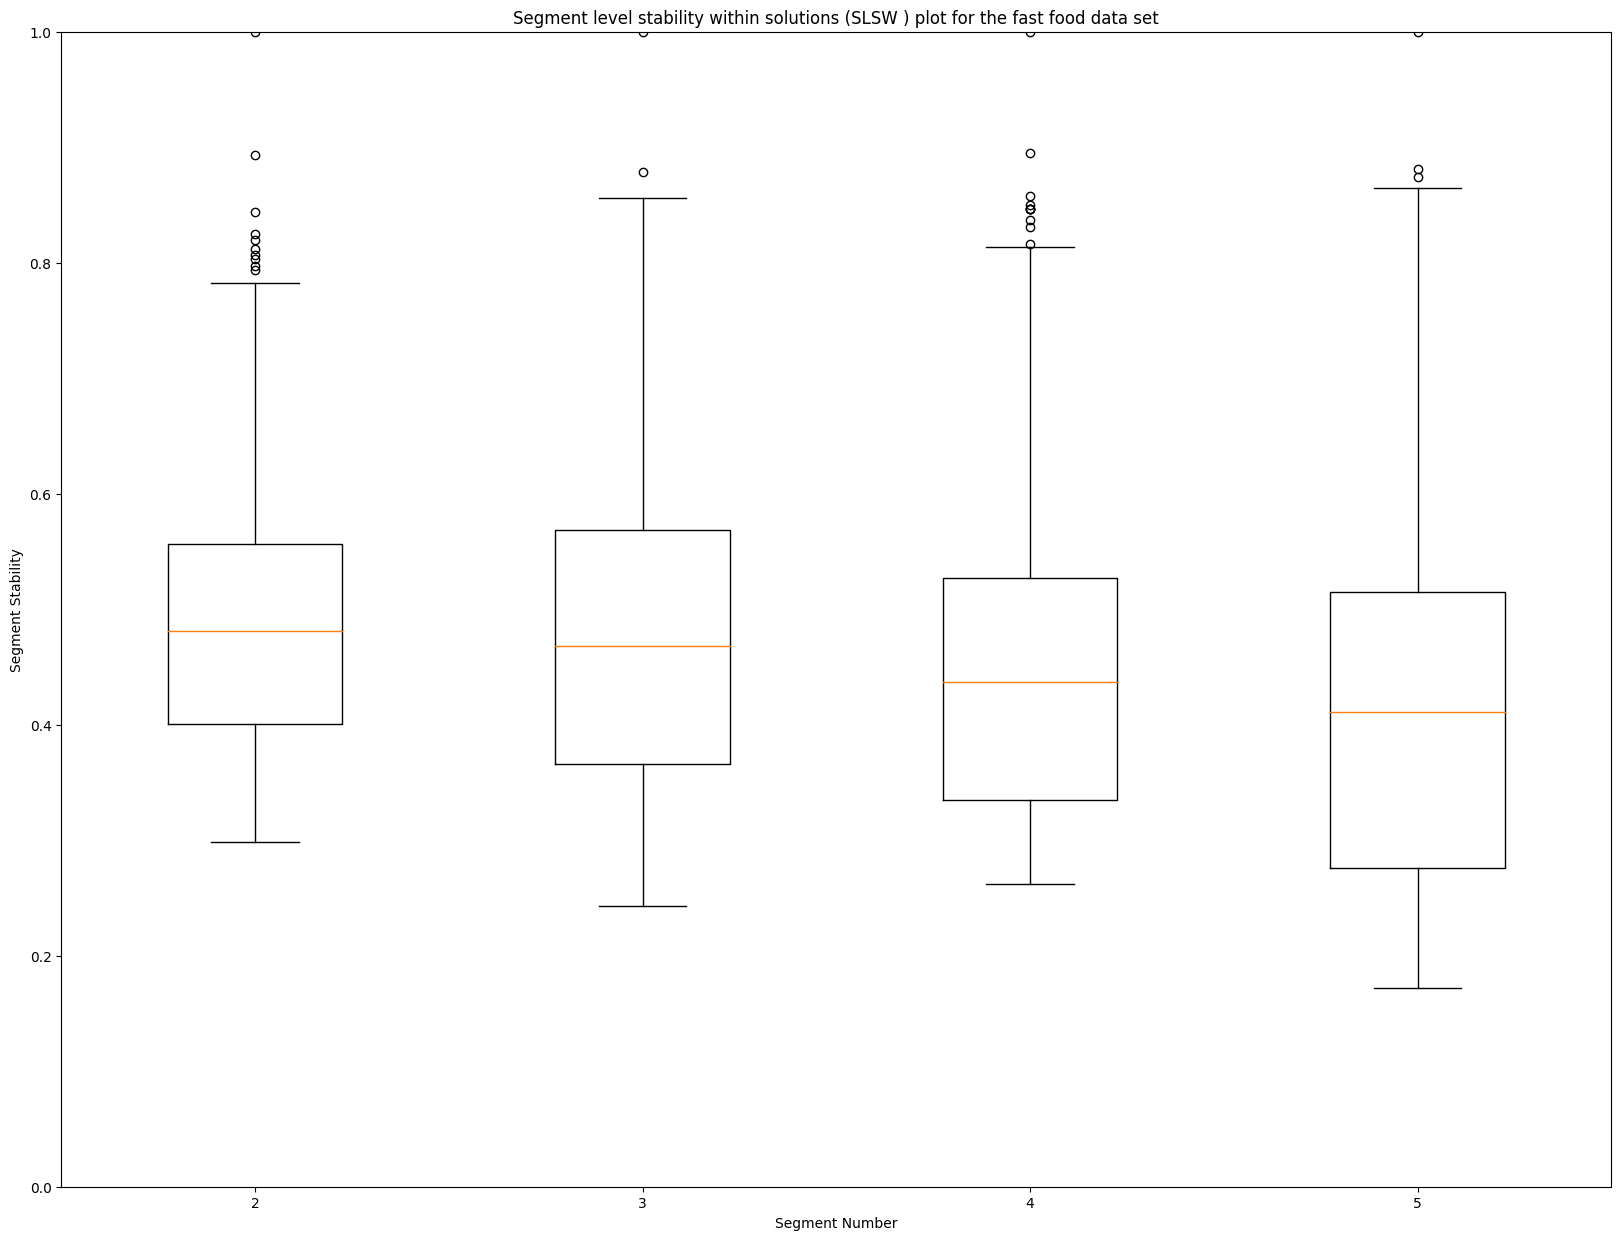

In [101]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

# Assuming MD_x is your data and MD_km28 stores cluster labels for different KMeans runs
for segment in segment_solutions:
    # Assuming int(segment) is the actual number of clusters for this segment
    num_clusters = int(segment)  # Modify this line if cluster numbers are stored differently

    # Create a new KMeans model for each segment
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, random_state=1234)
    kmeans.fit(MD_x)

    # Store cluster labels and similarities for this segment
    segment_labels[segment] = kmeans.predict(MD_x)
    segment_similarities[segment] = kmeans.transform(MD_x).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment level stability within solutions (SLSW ) plot for the fast food data set")

plt.show()

In [102]:
# #latent class analysis

In [103]:
# Mixtures of Distributions 	Using  GMM model it calculates log likely hood score

   iter  converged  k        k0     logLik           AIC           BIC       ICL
0     5       True  2  0.375086  -2.643568  -7592.207335  -7354.544980  0.230150
1     7       True  3  0.357880  -6.542079 -18875.280724 -18516.146499  0.221490
2     9       True  4  0.262280 -12.250103 -35416.799505 -34936.193409  0.203517
3     6       True  5  0.174133  -9.301245 -26801.418254 -26199.340288  0.247055
4    20       True  6  0.149341 -12.418806 -35815.051068 -35091.501232  0.220660
5     9       True  7  0.118376 -12.933576 -37264.970636 -36419.948930  0.267177
6    11       True  8  0.078537 -15.235943 -43909.651551 -42943.157975  0.231838


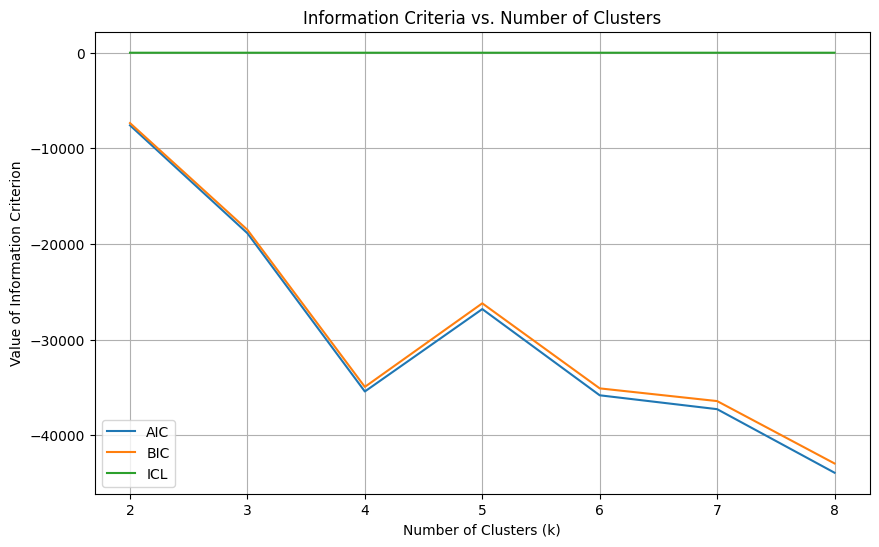

In [104]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Define column headers
column_headers = ["iter", "converged", "k", "k0", "logLik", "AIC", "BIC", "ICL"]

# Initialize empty list to store results
results = []
data = MD_x  # Assuming MD_x is your data

# Initialize empty lists to store information criteria scores
aic_scores = []
bic_scores = []
icl_scores = []

# Iterate through the range of k values
for k in k_range:
    model = GaussianMixture(n_components=k, covariance_type='diag')  # Specify covariance type
    model.fit(data)

    # Check convergence status
    converged = model.converged_

    # Calculate AIC and BIC
    aic = model.aic(data)
    bic = model.bic(data)
    aic_scores.append(aic)
    bic_scores.append(bic)

    # Calculate Silhouette Coefficient (optional)
    icl = silhouette_score(data, model.predict(data))
    icl_scores.append(icl)

    # Create a dictionary to store results for this iteration
    iteration_results = {
        "iter": model.n_iter_,
        "converged": converged,
        "k": k,
        "k0": model.weights_[0],  # Assuming k0 is the first weight (modify if needed)
        "logLik": -model.score(data),  # Negate log-likelihood for consistency
        "AIC": aic,
        "BIC": bic,
        "ICL": icl
    }

    # Append the dictionary to the results list
    results.append(iteration_results)

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(results, columns=column_headers)

# Print the DataFrame (optional)
print(df.to_string())

# Create the information criteria plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, aic_scores, label='AIC')
plt.plot(k_range, bic_scores, label='BIC')
plt.plot(k_range, icl_scores, label='ICL')  # Include ICL if calculated
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Value of Information Criterion')
plt.title('Information Criteria vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
# Mixtures of Distributions using Kmeans and entropy

In [106]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD_x)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD_x.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     6       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     9       True  4   4 -1604.107292  3216.214583  3237.340126  3235.989403
3    11       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.652440  2675.304880  2706.993194  2705.228430
5     6       True  7   7 -1248.417887  2510.835774  2547.805474  2545.884829
6     9       True  8   8 -1182.100019  2380.200037  2422.451123  2420.433939


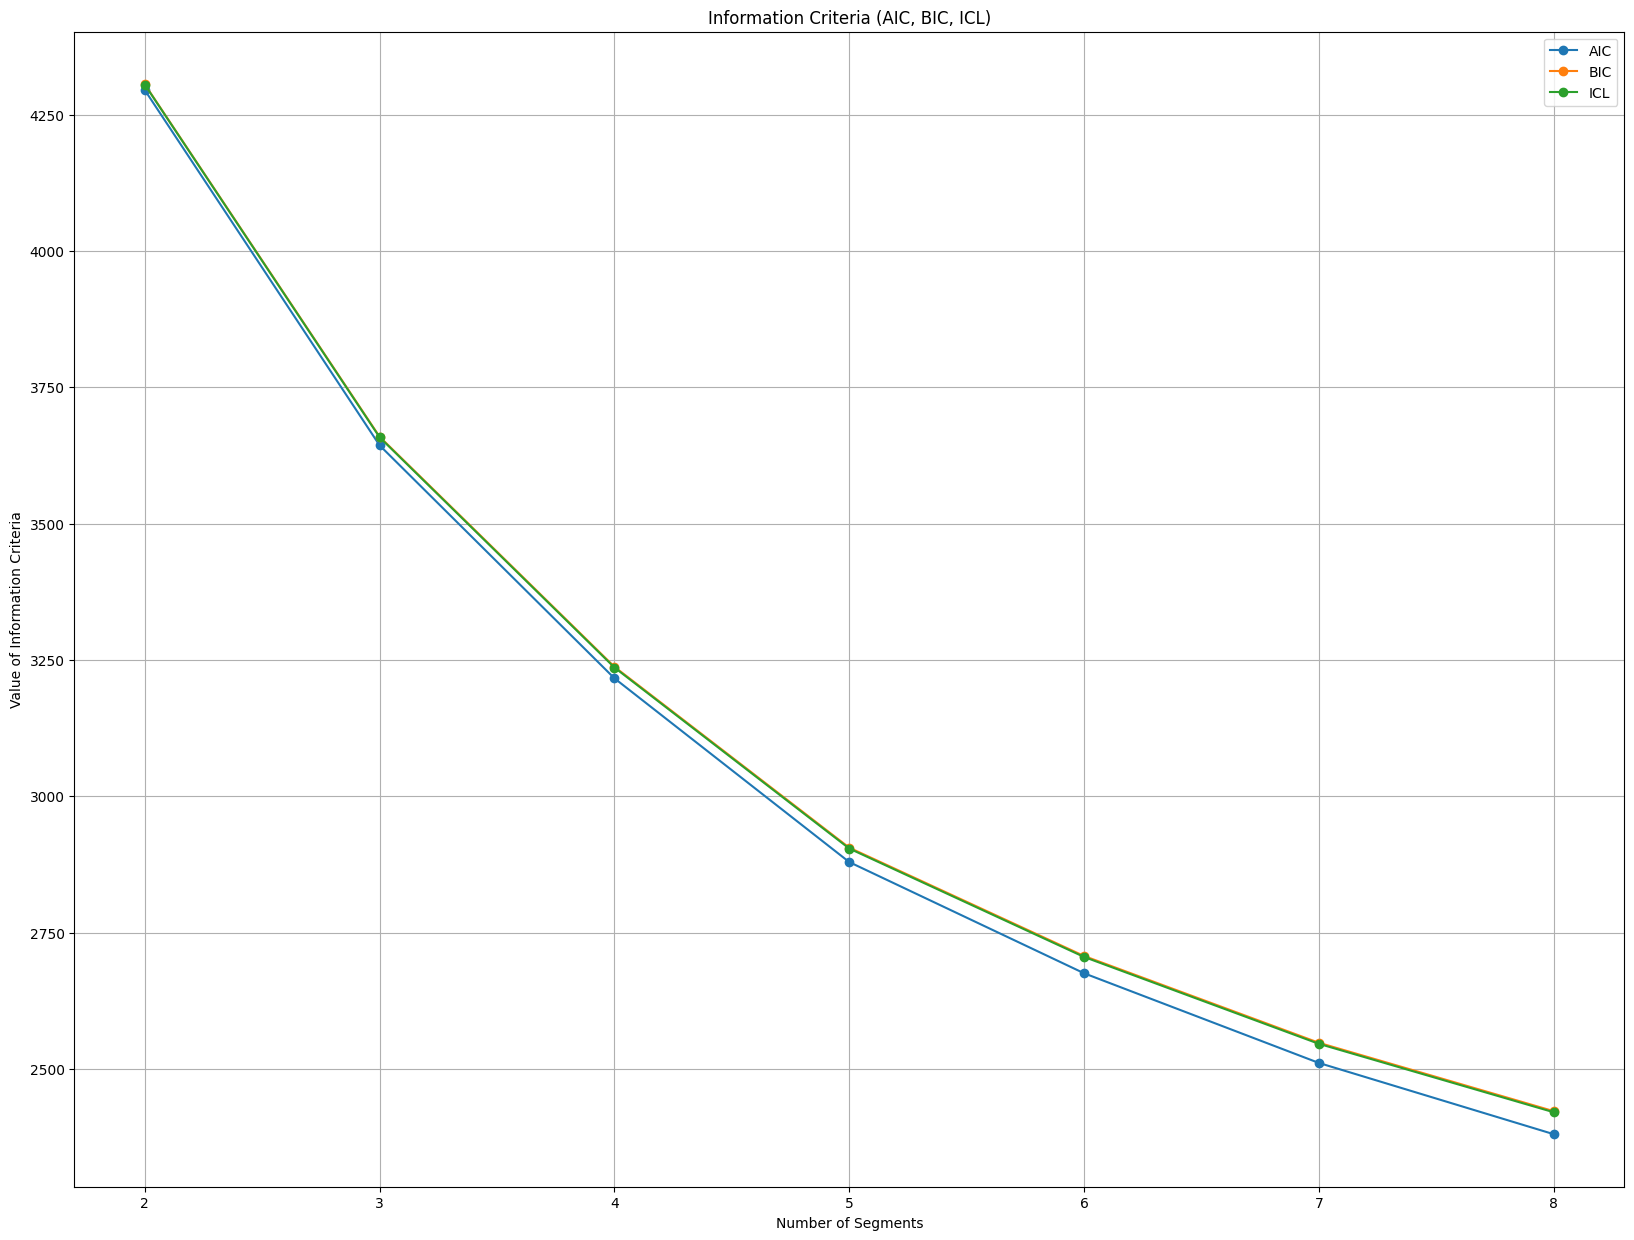

In [107]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [108]:
#GaussianMixture

In [109]:
# # Get the KMeans cluster assignments for segment 4
# k = 4
# MD_k4 = KMeans(n_clusters=k, random_state=1234)
# kmeans.fit(MD_x)
# kmeans_clusters = kmeans.predict(MD_x)



# guassian_model = GaussianMixture(n_components=k, covariance_type='diag')
# guassian_model.fit(MD_x)
# guassian_cluster=guassian_model.predict(MD_x)

# results=pd.DataFrame({'kmeans':kmeans_clusters,'mixture':guassian_cluster})


# # Get the mixture model cluster assignments for segment 4
# MD_m4 = MD_x[results['mixture'] == 3]



# results_m4 = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': 3})

# print(pd.crosstab(results['kmeans'], results['mixture']))
# print(pd.crosstab(results['kmeans'], results_m4['kmeans']))


k = 4
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.predict(MD_x)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD_x[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


In [110]:
MD_m4a = GaussianMixture(n_components=4, covariance_type='diag')
MD_m4a.fit(MD_x)
log_likelihood = MD_m4a.score_samples(MD_x)
# Print the log-likelihood and degrees of freedom MD_x
print("log Lik.", log_likelihood.mean(), "(MD_x=", len(log_likelihood), ")")



log Lik. 7.2825755006654145 (MD_x= 1453 )


In [111]:
# MD_m4 = KMeans(n_clusters=4, random_state=1234)
# MD_m4.fit(MD_x)
# log_likelihood = MD_m4.score(MD_x)
# # Print the log-likelihood and degrees of freedom MD_x
# print("log Lik.", log_likelihood.mean(), "(MD_x=", len(log_likelihood), ")")
# # MD_m4_clusters = MD_m4.predict(MD_x)

In [112]:
#A.5.3	Using Mixtures of Regression Models

In [113]:
# latent class regressions in mc_data2.ipynb